# Imports

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

#Importing the dataset

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
os.chdir("/content/gdrive/My Drive/")

In [0]:
df = pd.read_excel("./poster/sp1/ENB2012_data.xlsx")
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']

In [5]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# EDA (Exploratory data analysis)

### X1 -> Relative Compactness

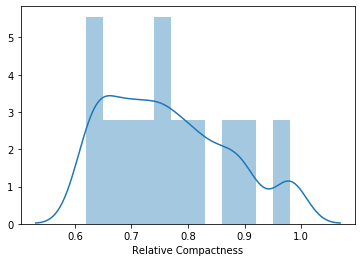

In [6]:
sn.distplot(df['Relative Compactness'])

### X2 -> Surface Area

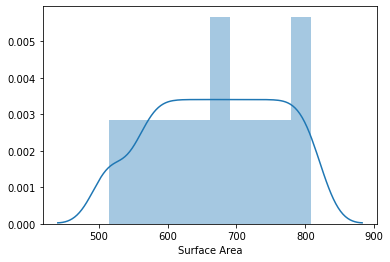

In [7]:
sn.distplot(df['Surface Area'])

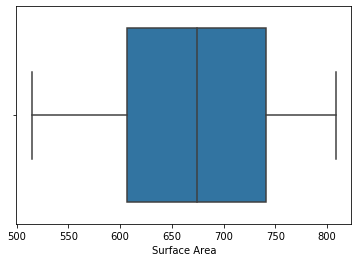

In [8]:
sn.boxplot(df['Surface Area'])

### X3 -> Wall Area

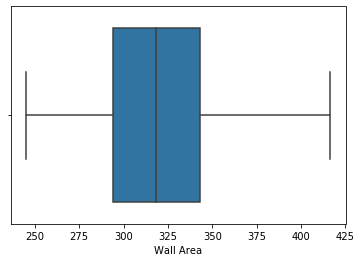

In [9]:
sn.boxplot(df['Wall Area'])

### X4 -> Roof Area

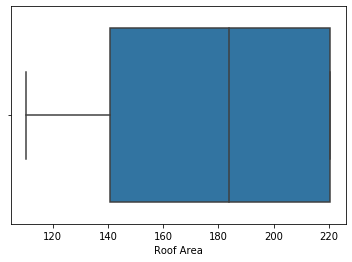

In [10]:
sn.boxplot(df['Roof Area'])

### X5 -> Overall Height

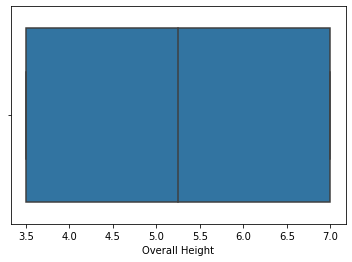

In [11]:
sn.boxplot(df['Overall Height'])

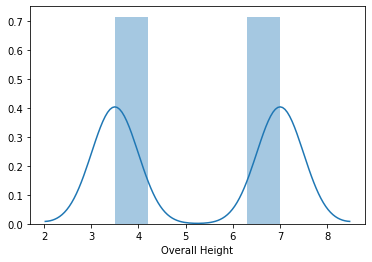

In [12]:
sn.distplot(df['Overall Height'])

### X6 -> Orientation

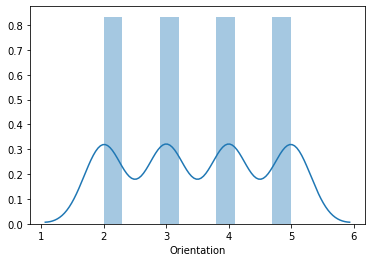

In [13]:
sn.distplot(df['Orientation'])

### X7 -> Glazing Area

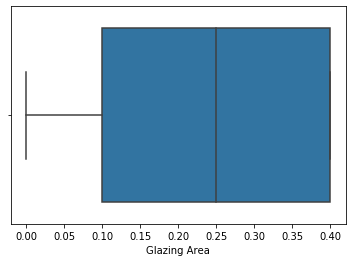

In [14]:
sn.boxplot(df['Glazing Area'])

### X8 -> Glazing Area Distribution

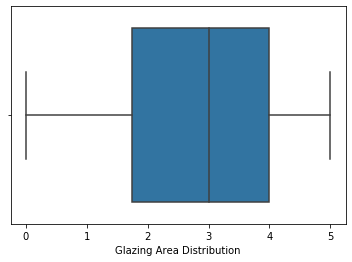

In [15]:
sn.boxplot(df['Glazing Area Distribution'])

### Y1 -> heating load

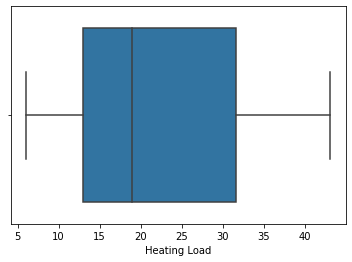

In [16]:
sn.boxplot(df['Heating Load'])

### Y2 -> cooling load

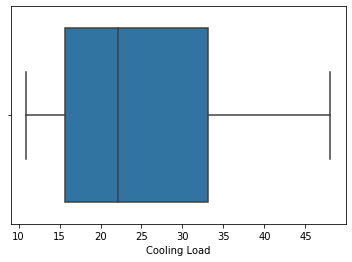

In [17]:
sn.boxplot(df['Cooling Load'])

# Correlacion

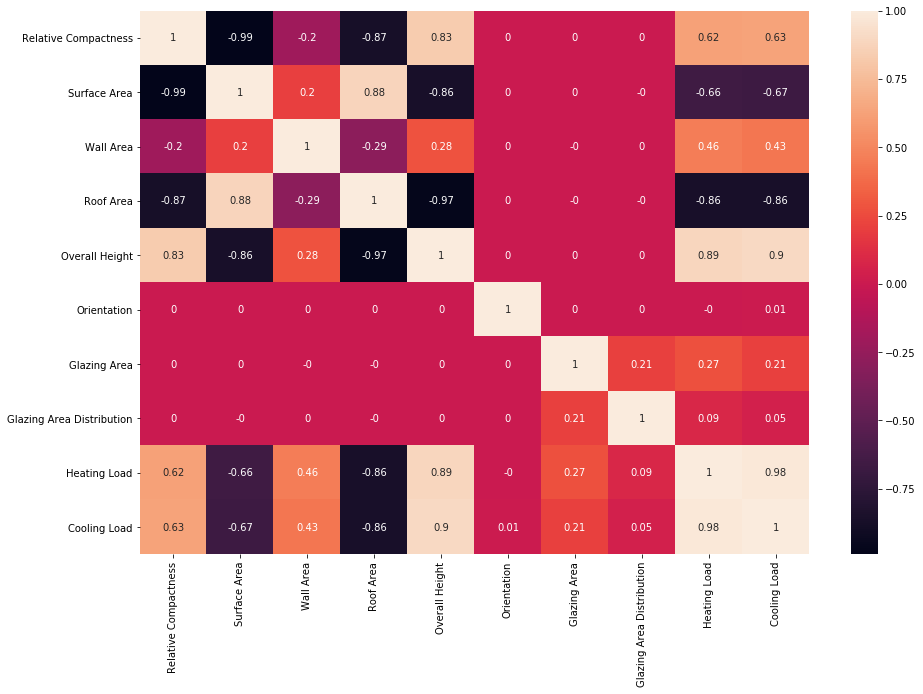

In [18]:
corrMatrix = df.corr().round(decimals=2)
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(corrMatrix, annot=True, ax=ax)

In [19]:
df.corr().round(decimals=2)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,0.00,0.00,0.62,0.63
Surface Area,-0.99,1.00,0.20,0.88,-0.86,0.00,0.00,-0.00,-0.66,-0.67
Wall Area,-0.20,0.20,1.00,-0.29,0.28,0.00,-0.00,0.00,0.46,0.43
Roof Area,-0.87,0.88,-0.29,1.00,-0.97,0.00,-0.00,-0.00,-0.86,-0.86
Overall Height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,0.00,0.89,0.90
Orientation,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.01
Glazing Area,0.00,0.00,-0.00,-0.00,0.00,0.00,1.00,0.21,0.27,0.21
Glazing Area Distribution,0.00,-0.00,0.00,-0.00,0.00,0.00,0.21,1.00,0.09,0.05
Heating Load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling Load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


# Scatter Plot Matrix

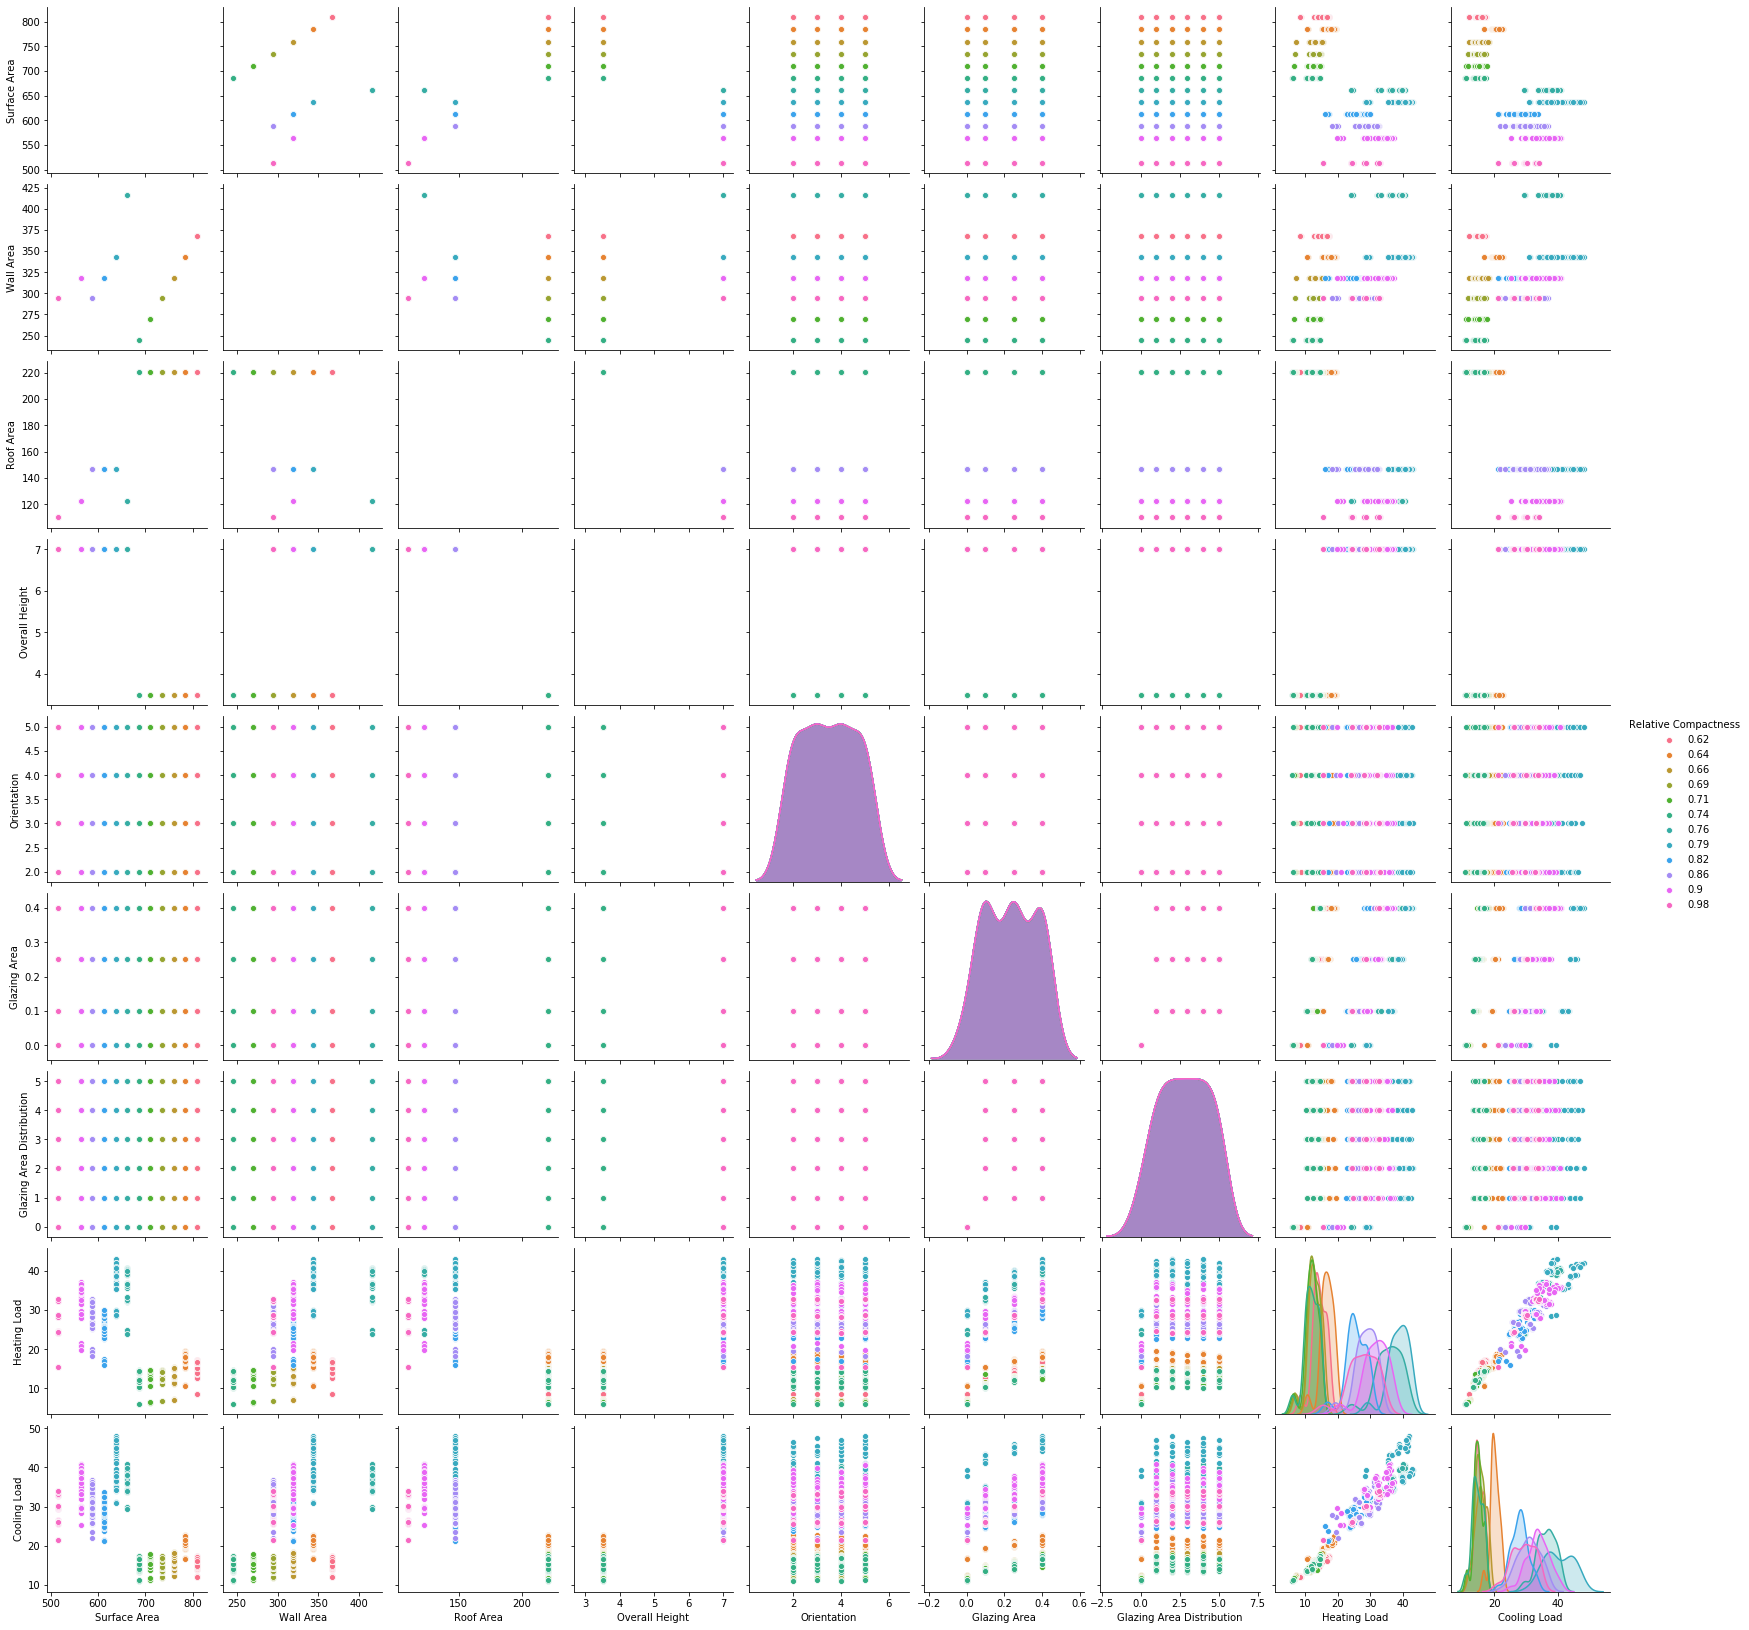

In [20]:
sn.pairplot(df, hue="Relative Compactness")

# Outlier analysis (Analisis de outliers)


In [0]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    # Set upper and lower limit to 3 standard deviation
    std_data = data.std()
    mean_data = data.mean()
    anomaly_cut_off = std_data * 3
    anomalies = []
    
    lower_limit  = mean_data - anomaly_cut_off 
    upper_limit = mean_data + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [40]:
for col in df.columns:
  print("Outliers encontrados para la variable %s" % col)
  colAnomalies = find_anomalies(df[col])
  print(colAnomalies)

Outliers encontrados para la variable Relative Compactness
0.4468342390424115
[]
Outliers encontrados para la variable Surface Area
407.4499851657286
[]
Outliers encontrados para la variable Wall Area
187.6205556860153
[]
Outliers encontrados para la variable Roof Area
41.106315997905625
[]
Outliers encontrados para la variable Overall Height
-0.003421310236048747
[]
Outliers encontrados para la variable Orientation
0.14371223881890938
[]
Outliers encontrados para la variable Glazing Area
-0.16528668874412447
[]
Outliers encontrados para la variable Glazing Area Distribution
-1.8403789926742515
[]
Outliers encontrados para la variable Heating Load
-7.963416598061102
[]
Outliers encontrados para la variable Cooling Load
-3.9521562703117787
[]


Por lo tanto logramos ver de que no tenemos outliers dentro de nuestro dataset

# Normalizacion

In [41]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [0]:
def normalize(df, filter):
    result = df.copy()
    for feature_name in filter:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [0]:
normalized_df = normalize(df, ['Surface Area', 'Wall Area', 'Roof Area'])

In [48]:
normalized_df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


In [0]:
normalized_df.to_csv("./poster/sp1/normalized_energy_efficiency_dataset.csv")
